# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [41]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head(n=2)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [42]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [43]:
sinasc_raw.isna().sum()

ORIGEM          0
CODESTAB      115
CODMUNNASC      0
LOCNASC         0
IDADEMAE        0
             ... 
munResUf        0
munResLat       1
munResLon       1
munResAlt       1
munResArea      1
Length: 69, dtype: int64

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [44]:
# sinasc_raw.groupby(by='munResNome')[['IDADEMAE', 'IDADEPAI']].mean()

sinasc_raw.groupby(by='munResNome')[['IDADEMAE',
                                     'IDADEPAI']].agg({'IDADEMAE':[('Média','mean')],
                                                       'IDADEPAI':[('Média','mean')]})

,IDADEMAE,IDADEPAI
,Média,Média
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [45]:
sinasc_raw.DTNASC = pd.to_datetime(sinasc_raw.DTNASC)

sinasc_aniversario = sinasc_raw[(sinasc_raw.DTNASC.dt.day == 24) &
                                (sinasc_raw.DTNASC.dt.month == 6)]

sinasc_aniversario = sinasc_aniversario.groupby(by=['DTNASC',
                                                    'SEXO',
                                                    'ESCMAE'])['PESO'].mean()

sinasc_aniversario

DTNASC      SEXO       ESCMAE         
2019-06-24  Feminino   12 anos ou mais    3489.285714
                       4 a 7 anos         2910.000000
                       8 a 11 anos        3407.210526
            Masculino  12 anos ou mais    3605.555556
                       4 a 7 anos         3107.777778
                       8 a 11 anos        3296.809524
Name: PESO, dtype: float64

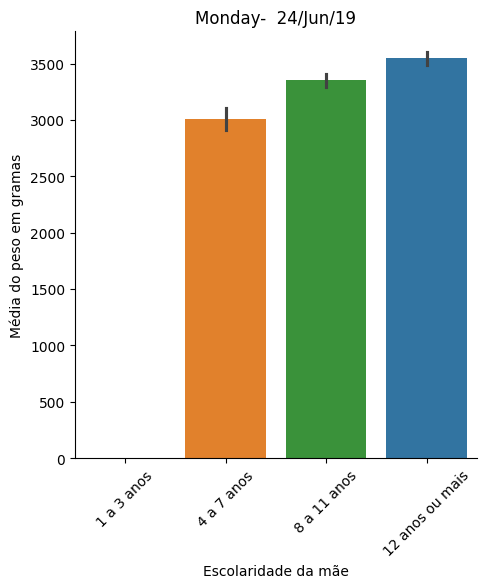

In [46]:
data = sinasc_aniversario.index.get_level_values(level=0).unique()[0].date()

sns.catplot(x='ESCMAE',
            y='PESO',
            data=sinasc_aniversario.reset_index(level='DTNASC',
                                                drop=True).reset_index(),
            hue='ESCMAE',
            kind='bar',
            order=['1 a 3 anos',
                   '4 a 7 anos',
                   '8 a 11 anos',
                   '12 anos ou mais'])
plt.xticks(rotation=45)
plt.xlabel(xlabel='Escolaridade da mãe')
plt.ylabel(ylabel='Média do peso em gramas')
plt.title(label=data.strftime('%A-  %d/%b/%y'));

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [47]:
municipios = sinasc_raw.munResNome.value_counts().sort_values().head()

municipios

Município ignorado - RO     1
Castanheiras               32
Pimenteiras do Oeste       40
Primavera de Rondônia      43
Parecis                    44
Name: munResNome, dtype: int64

In [48]:
idades = sinasc_raw[sinasc_raw['munResNome'] == 'Castanheiras'][['munResNome', 'IDADEMAE', 'IDADEPAI']]

idades.groupby('munResNome').agg([('mín', 'min'), 'max', ('média','median')])

IDADEMAE           IDADEPAI            
                  mín max média      mín   max média
munResNome                                          
Castanheiras       17  39  27.0     17.0  43.0  31.5

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [49]:
sinasc_mar = sinasc_raw[sinasc_raw.DTNASC.dt.month == 3].copy()

sinasc_mar['MES'] = sinasc_mar['DTNASC'].dt.month_name()

sinasc_mar


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,MES
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,March
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,March
5,1,2516500.0,110001,1,33,5.0,1 a 3 anos,621005.0,2.0,1.0,...,6,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,March
9,1,2679477.0,110001,1,30,2.0,1 a 3 anos,999992.0,1.0,1.0,...,10,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,March
10,1,2679477.0,110001,1,31,5.0,8 a 11 anos,512105.0,1.0,0.0,...,11,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13670,1,2000733.0,120040,1,24,5.0,8 a 11 anos,999992.0,0.0,0.0,...,18687,ATIVO,MUNIC,Porto Velho,Rondônia,-8.76889,-63.83145,87.0,34096.394,March
13671,1,2000733.0,120040,1,24,5.0,4 a 7 anos,999992.0,2.0,0.0,...,18702,ATIVO,MUNIC,Porto Velho,Rondônia,-8.76889,-63.83145,87.0,34096.394,March
13736,1,2688611.0,355030,1,35,2.0,12 anos ou mais,10210.0,1.0,0.0,...,1066018,ATIVO,MUNIC,Porto Velho,Rondônia,-8.76889,-63.83145,87.0,34096.394,March
13748,1,2311682.0,510340,1,36,4.0,12 anos ou mais,354605.0,2.0,1.0,...,1386627,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,March


In [50]:
mais_filhos = sinasc_mar.munResNome.value_counts().sort_values(ascending = False ).head()

mais_filhos.to_frame()

,munResNome
Porto Velho,744
Ji-Paraná,188
Vilhena,148
Ariquemes,141
Cacoal,133


In [51]:
print(f'O município que teve mais nascimentos no mês de março, foi  Porto Velho com: {mais_filhos[0]}')

O município que teve mais nascimentos no mês de março, foi  Porto Velho com: 744


In [52]:
idades_pais = sinasc_mar[sinasc_mar['munResNome'] == 'Porto Velho'][[ 'MES','IDADEMAE', 'IDADEPAI','QTDFILVIVO']]

idades_pais.groupby('MES').agg([('mín', 'min'), 'max', ('média','median')])

IDADEMAE           IDADEPAI             QTDFILVIVO           
           mín max média      mín   max média        mín  max média
MES                                                                
March       14  44  26.0     19.0  62.0  34.0        0.0  9.0   1.0

In [53]:
filhos_vivos = sinasc_mar[sinasc_mar['munResNome'] == 'Porto Velho'][['MES', 'QTDFILVIVO',]]

filhos_vivos.groupby('MES').agg([('mín', 'min'), 'max', ('média','median')])

QTDFILVIVO           
             mín  max média
MES                        
March        0.0  9.0   1.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

**Insights**

*  Ao observarmos os dados, podemos concluir que ambos municípios apresentam valores próximos, tanto na média quanto na mínima das idades. Sendo que Castanheiras, a mínima é de 17 anos e a média de 31, já Porto velho a mínima é de 19 anos e a média de 34 anos estando bem próximos um do outro. A grande diferença se encontra na idade máxima de ambos municípios, em Porto Alegre a idade máxima é de 62 anos, enquanto que em castanheiras esse valor cai para 43 anos.



In [54]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [55]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [56]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')